In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [2]:
#import warnings
#warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("processed_train.csv")

In [4]:
df.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,sales_per_mrp,Item_Outlet_Sales_Log
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,156,0.263158,0.016047,0.942036,9,1999.0,3735.1380,25,14.951963,8.225808
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,0.047528,0.019278,0.057933,3,2009.0,443.4228,15,9.186454,6.096776
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662,0.786284,0.016760,0.467430,9,1999.0,2097.2700,25,14.809346,7.648868
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1121,0.894737,0.000000,0.644992,0,1998.0,732.3800,26,4.021967,6.597664
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1297,0.239553,0.000000,0.082465,1,1987.0,994.7052,37,18.467868,6.903451


train_df = df.iloc[:int(0.7*32)]  # First 70% for training
test_df = df.iloc[int(0.7*32):]   # Last 30% for testing

X_train = train_df.drop(columns=['Item_Outlet_Sales'],axis=1)  
y_train = train_df['Item_Outlet_Sales'] 

X_test = test_df.drop(columns=['Item_Outlet_Sales'],axis=1)
y_test = test_df['Item_Outlet_Sales']

In [5]:
# Split the dataset into features 
x=df.drop(['Item_Outlet_Sales','Item_Outlet_Sales_Log'],axis=1)
x.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_age,sales_per_mrp
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,156,0.263158,0.016047,0.942036,9,1999.0,25,14.951963
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,8,0.047528,0.019278,0.057933,3,2009.0,15,9.186454
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,662,0.786284,0.016760,0.467430,9,1999.0,25,14.809346
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1121,0.894737,0.000000,0.644992,0,1998.0,26,4.021967
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1297,0.239553,0.000000,0.082465,1,1987.0,37,18.467868


In [6]:
# Split the dataset into target
y=df['Item_Outlet_Sales_Log']
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales_Log, dtype: float64

In [7]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
print(len(x_train),len(y_train))

5966 5966


In [9]:
print(len(x_test),len(y_test))

2557 2557


In [10]:
x['Outlet_Identifier']

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet_Identifier, Length: 8523, dtype: int64

In [11]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [12]:
#get feature importance and select top features
importances=rf.feature_importances_

# Select the top features
num_features = min(10, len(importances))  # Get the top 10 or fewer if there are less
important_features = x.columns[np.argsort(importances)[-num_features:]]


In [13]:
# Reducing X to only important features
x_train_important = x_train[important_features]
x_test_important = x_test[important_features]

In [14]:
print(x_train.shape,x_train_important.shape)

(5966, 34) (5966, 10)


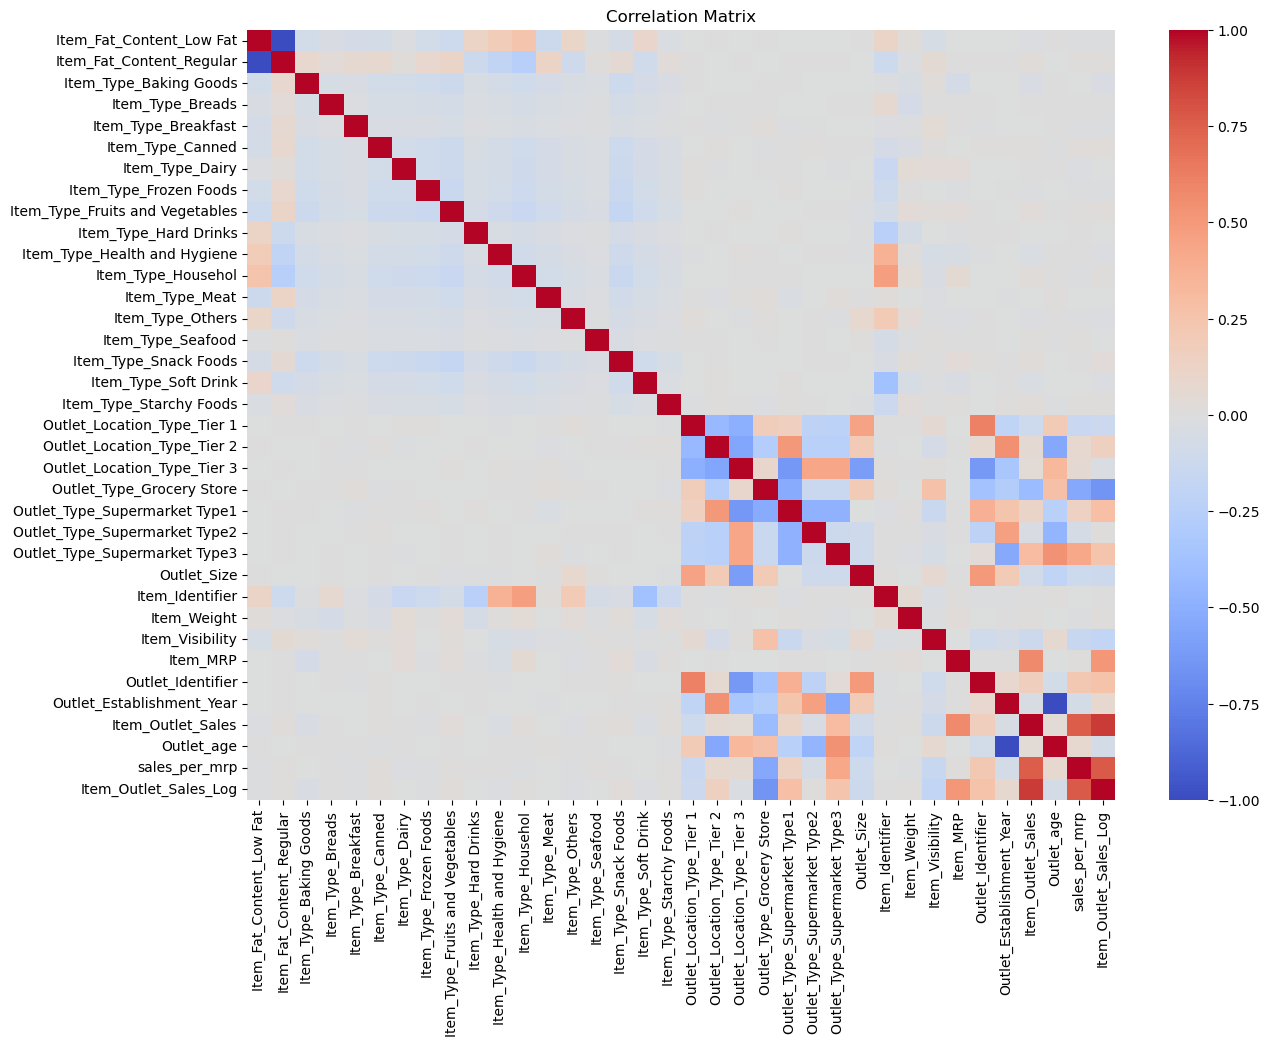

In [15]:
# Plot the correlation matrix
correlation_matrix=df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Initialize simpler models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    #'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
    'KNeighbors Regression' : KNeighborsRegressor(n_neighbors=5),
    'DecisionTree' :DecisionTreeRegressor(),
    'MLP' :MLPRegressor(hidden_layer_sizes=(100), max_iter=300),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    
}

#Function to evaluate model using cross -validation
def evaluate_models(models,x,y):
    results={}
    for name, model in models.items():
        # perform 5- fold cross-validation
        cv_scores=cross_val_score(model,x,y,cv=5,scoring='r2')
        results[name]={
            "Mean R2" :cv_scores.mean(),
            "Standard Deviation" : cv_scores.std()
        }
    return results

# Evaluate all models on the important features
model_results = evaluate_models(models, x_train_important, y_train)

# Display results
for model, metrics in model_results.items():
    print(f"{model}: Mean R2 = {metrics['Mean R2']:.4f}, Std Dev = {metrics['Standard Deviation']:.4f}")

# Choose the best model based on the highest mean R² score
best_model_name = max(model_results, key=lambda x: model_results[x]["Mean R2"])
print(f"\nBest Model: {best_model_name}")

Linear Regression: Mean R2 = 0.9185, Std Dev = 0.0033
Random Forest: Mean R2 = 0.9994, Std Dev = 0.0001
KNeighbors Regression: Mean R2 = 0.5934, Std Dev = 0.0077
DecisionTree: Mean R2 = 0.9977, Std Dev = 0.0004
MLP: Mean R2 = 0.8844, Std Dev = 0.0385
XGBoost: Mean R2 = 0.9986, Std Dev = 0.0002

Best Model: Random Forest


In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'max_depth': [3,5,7],                       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
}

# Initialize the RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    scoring='r2',
    cv=5,              # 5-fold cross-validation
    n_jobs=-1          # Use all available processors
)

# Fit the model to the training data
grid_search.fit(x_train_important, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [22]:
# Output the best parameters and best score
best_rfr_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best R² Score:", best_score)

Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score: 0.9971631531234195


In [23]:
# Evaluate the best Random Forest model on the test set
y_pred_best_rfr = best_rfr_model.predict(x_test_important)
mse_best_rfr = mean_squared_error(y_test, y_pred_best_rfr)
r2_best_rfr = r2_score(y_test, y_pred_best_rfr)

# Output the results
print("Mean Squared Error (Best Random Forest):", mse_best_rfr)
print("R² Score (Best Random Forest):", r2_best_rfr)


Mean Squared Error (Best Random Forest): 0.002801998158757075
R² Score (Best Random Forest): 0.9972544962530344
